[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


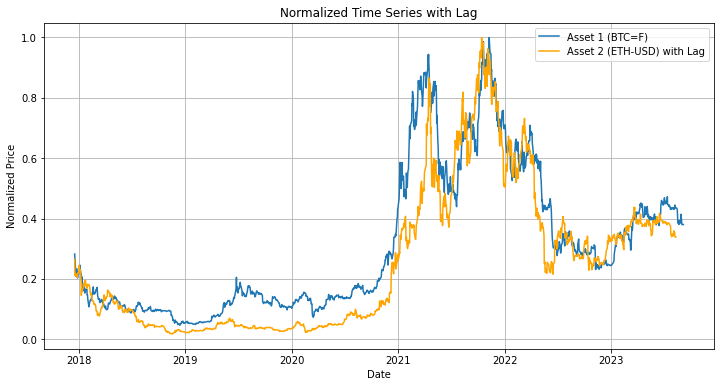

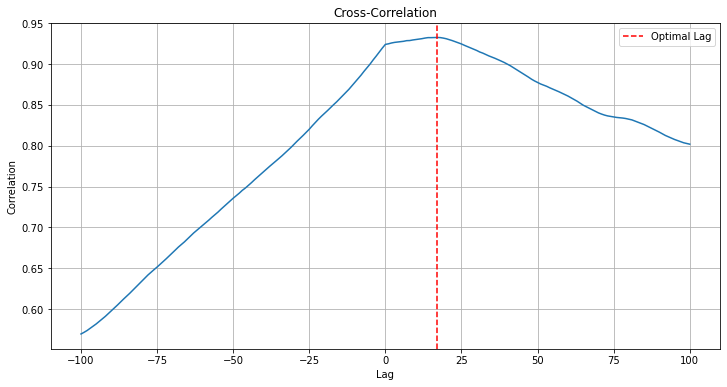

The optimal lag is approximately 17 days with a maximum correlation of 0.9324005850606928.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import timedelta

yf.pdr_override()

# Getting the data
start_date = '2016-01-01'
end_date = '2023-09-07'
asset1 = pdr.get_data_yahoo('BTC=F', start=start_date, end=end_date)
asset2 = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)

print(asset1.columns)
# Aligning the data based on common dates
common_dates = asset1.index.intersection(asset2.index)
asset1 = asset1.loc[common_dates]
asset2 = asset2.loc[common_dates]

# Calculate cross-correlation at different lags
max_lag = 100  # Maximum time lag to consider
correlations = []
lags = range(-max_lag, max_lag + 1)

for lag in lags:
    shifted_asset2 = asset2['Close'].shift(-lag)
    corr = asset1['Close'].corr(shifted_asset2)
    correlations.append(corr)

# Find the lag with maximum correlation
optimal_lag = lags[np.argmax(correlations)]
max_correlation = np.max(correlations)

# Apply the lag to asset2
asset2_lagged = asset2['Close'].shift(-optimal_lag)

# Normalize data for plotting
normalized_asset1 = asset1['Close'] / asset1['Close'].max()
normalized_asset2 = asset2_lagged / asset2_lagged.max()

# Calculate the temporal offset in days
temporal_offset = timedelta(days=int(optimal_lag))

# Plotting the two time series with the lag applied
plt.figure(figsize=(12, 6))
plt.plot(asset1.index, normalized_asset1, label='Asset 1 (BTC=F)')
plt.plot(asset2.index, normalized_asset2, label='Asset 2 (ETH-USD) with Lag', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Time Series with Lag')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label='Optimal Lag')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal lag is approximately {temporal_offset.days} days with a maximum correlation of {max_correlation}.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


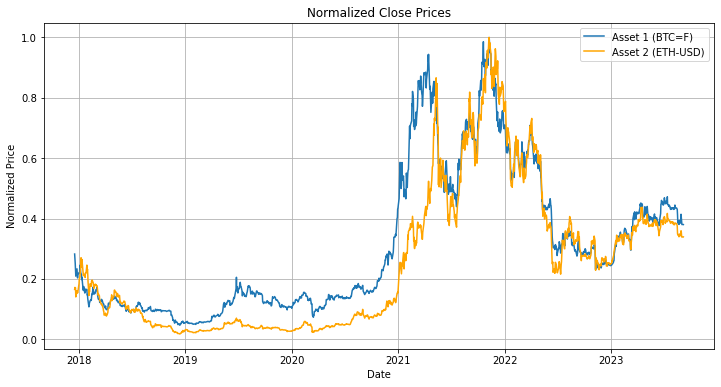

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

# Getting the data
start_date = '2016-01-01'
end_date = '2023-09-07'
asset1 = pdr.get_data_yahoo('BTC=F', start=start_date, end=end_date)
asset2 = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)

# Aligning the data based on common dates
common_dates = asset1.index.intersection(asset2.index)
asset1 = asset1.loc[common_dates]
asset2 = asset2.loc[common_dates]

# Normalize data for plotting
normalized_asset1 = asset1['Close'] / asset1['Close'].max()
normalized_asset2 = asset2['Close'] / asset2['Close'].max()

# Plotting the normalized close prices of both assets
plt.figure(figsize=(12, 6))
plt.plot(asset1.index, normalized_asset1, label='Asset 1 (BTC=F)')
plt.plot(asset2.index, normalized_asset2, label='Asset 2 (ETH-USD)', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Close Prices')
plt.legend()
plt.grid(True)
plt.show()

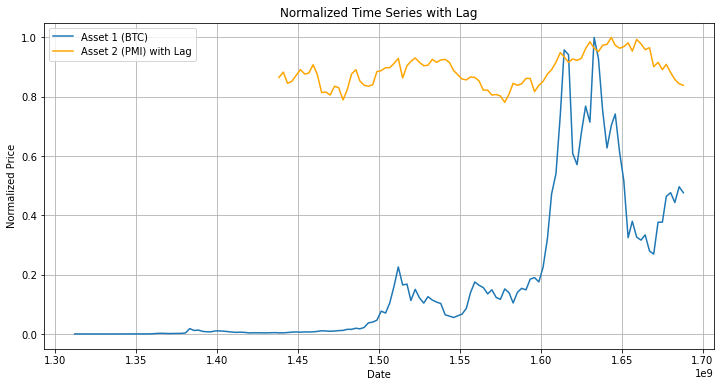

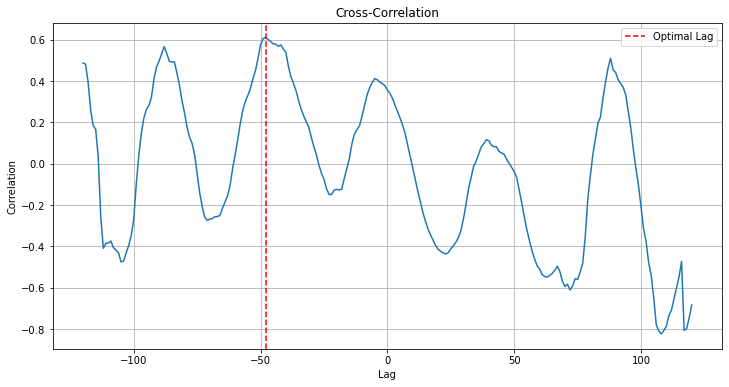

The optimal lag is approximately -48 days with a maximum correlation of 0.6111855082799439.


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import timedelta

# Define file paths for asset1 and asset2 CSV files
asset1_file = 'chart01_asset01_1month_btc.csv'
asset2_file = 'chart01_asset02_1month_pmi.csv'


# Read data from CSV files
asset1 = pd.read_csv(asset1_file, parse_dates=['time'], index_col='time')
asset2 = pd.read_csv(asset2_file, parse_dates=['time'], index_col='time')

# Aligning the data based on common dates
common_dates = asset1.index.intersection(asset2.index)
asset1 = asset1.loc[common_dates]
asset2 = asset2.loc[common_dates]

# Calculate cross-correlation at different lags
max_lag = 120  # Maximum time lag to consider
correlations = []
lags = range(-max_lag, max_lag + 1)

for lag in lags:
    shifted_asset2 = asset2['close'].shift(-lag)
    corr = asset1['close'].corr(shifted_asset2)
    correlations.append(corr)

# Find the lag with maximum correlation
optimal_lag = lags[np.argmax(correlations)]
max_correlation = np.max(correlations)

# Apply the lag to asset2
asset2_lagged = asset2['close'].shift(-optimal_lag)

# Normalize data for plotting
normalized_asset1 = asset1['close'] / asset1['close'].max()
normalized_asset2 = asset2_lagged / asset2_lagged.max()

# Calculate the temporal offset in days
temporal_offset = timedelta(days=int(optimal_lag))

# Plotting the two time series with the lag applied
plt.figure(figsize=(12, 6))
plt.plot(asset1.index, normalized_asset1, label='Asset 1 (BTC)')
plt.plot(asset2.index, normalized_asset2, label='Asset 2 (PMI) with Lag', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Time Series with Lag')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label='Optimal Lag')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal lag is approximately {temporal_offset.days} days with a maximum correlation of {max_correlation}.")

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import timedelta

# Define file paths for asset1 and asset2 CSV files
asset1_file = 'chart02_asset01_1week_btc.csv'
asset2_file = 'chart02_asset02_1week_copperGoldRatio.csv'


# Read data from CSV files
asset1 = pd.read_csv(asset1_file, parse_dates=['time'], index_col='time')
asset2 = pd.read_csv(asset2_file, parse_dates=['time'], index_col='time')

# Aligning the data based on common dates
common_dates = asset1.index.intersection(asset2.index)
asset1 = asset1.loc[common_dates]
asset2 = asset2.loc[common_dates]

# Calculate cross-correlation at different lags
max_lag = 500  # Maximum time lag to consider
correlations = []
lags = range(-max_lag, max_lag + 1)

for lag in lags:
    shifted_asset2 = asset2['close'].shift(-lag)
    corr = asset1['close'].corr(shifted_asset2)
    correlations.append(corr)

# Find the lag with maximum correlation
optimal_lag = lags[np.argmax(correlations)]
max_correlation = np.max(correlations)

# Apply the lag to asset2
asset2_lagged = asset2['close'].shift(-optimal_lag)

# Normalize data for plotting
normalized_asset1 = asset1['close'] / asset1['close'].max()
normalized_asset2 = asset2_lagged / asset2_lagged.max()

# Calculate the temporal offset in days
temporal_offset = timedelta(days=int(optimal_lag))

# Plotting the two time series with the lag applied
plt.figure(figsize=(12, 6))
plt.plot(asset1.index, normalized_asset1, label='Asset 1 (BTC)')
plt.plot(asset2.index, normalized_asset2, label='Asset 2 (PMI) with Lag', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Time Series with Lag')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations)
plt.axvline(x=optimal_lag, color='r', linestyle='--', label='Optimal Lag')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-Correlation')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal lag is approximately {temporal_offset.days} days with a maximum correlation of {max_correlation}.")